# Avocado Project 

# Exploratory Data Analysis

Importing Libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
import scipy.stats as stats
from scipy.stats import norm 
import warnings
warnings.filterwarnings('ignore')

Importing the dataset

In [2]:
df=pd.read_csv("avocado.csv")

In [3]:
pd.pandas.set_option('display.max_columns',None)

First 5 entries

In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


Last 5 entries

In [5]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [6]:
df.shape

(18249, 14)

The dataset contains 18249 rows and 14 columns.

Datatype of the features

In [7]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Information about the features

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


Unique Values of the features

In [9]:
df.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
dtype: int64

changing datatype of date feature

In [10]:
df["Date"]=pd.to_datetime(df.Date)

In [11]:
df.dtypes

Unnamed: 0               int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [12]:
df['YEAR']=df['Date'].dt.year
df['month']=df['Date'].dt.month
df['day']=df['Date'].dt.day

In [13]:
df.head(2)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,YEAR,month,day
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,2015,12,27
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,2015,12,20


In [14]:
df=df.drop(['Date'],axis=1)
df=df.drop(['year'],axis=1)

In [15]:
df.head(2)

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,YEAR,month,day
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,12,27
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,12,20


# Missing Values

In [16]:
df.isnull().sum()

Unnamed: 0      0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
YEAR            0
month           0
day             0
dtype: int64

Heatmap of the null values

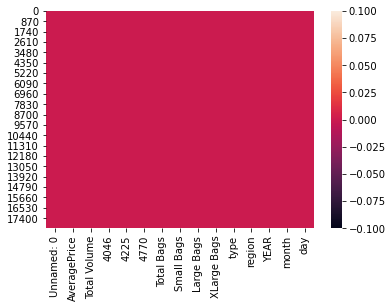

In [17]:
sns.heatmap(df.isnull());

# Statistical Calculation

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65


Mean is greater than 75th percentile indicates presence of outliers.

In [19]:
df.describe(include="O")

,type,region
count,18249,18249
unique,2,54
top,conventional,Northeast
freq,9126,338


Statistical heatmap

<AxesSubplot:>

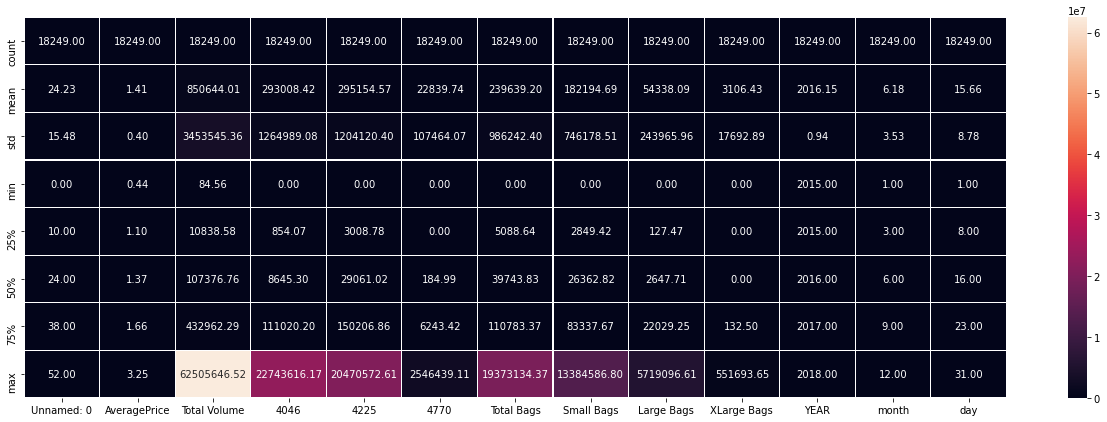

In [20]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidths=0.1,linecolor='white')

# Checking Correlation

In [21]:
df.corr()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,YEAR,month,day
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.171667,-0.777730,-0.088097
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197,0.162409,0.027386
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193,-0.024689,-0.009747
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353,-0.025803,-0.010159
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559,-0.022108,-0.012393
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531,-0.033424,-0.009009
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552,-0.022724,-0.004988
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915,-0.023126,-0.003870
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891,-0.020187,-0.008352
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033,-0.012969,0.000319


<AxesSubplot:>

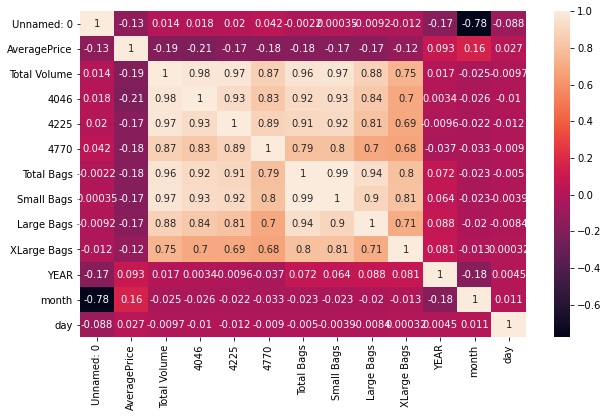

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True)

Features which are highly correlated with each othar are:
    1.Total Volume with 4225
    2.Total Volume with 4046
    3.Total volume with Small Bags
    4.Total volume with Total Bags
    5.Small Bags with Total Bags.

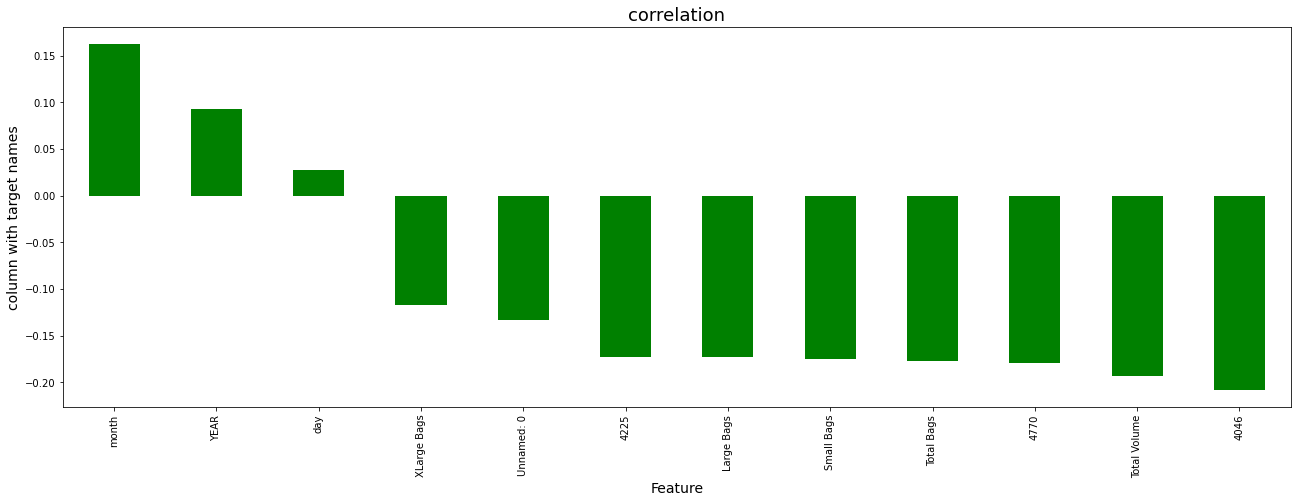

In [23]:
plt.figure(figsize=(22,7))
df.corr()['AveragePrice'].sort_values(ascending=False).drop(['AveragePrice']).plot(kind='bar',color="g")
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

Except month, YEAR and day all other features are negatively correlated with the target variable.

conventional    9126
organic         9123
Name: type, dtype: int64

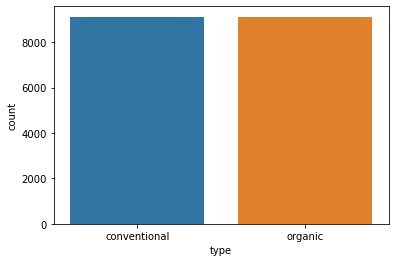

In [24]:
sns.countplot(x="type",data=df)
df.type.value_counts()

feature "type" is equally distributed in conventional and organic type.

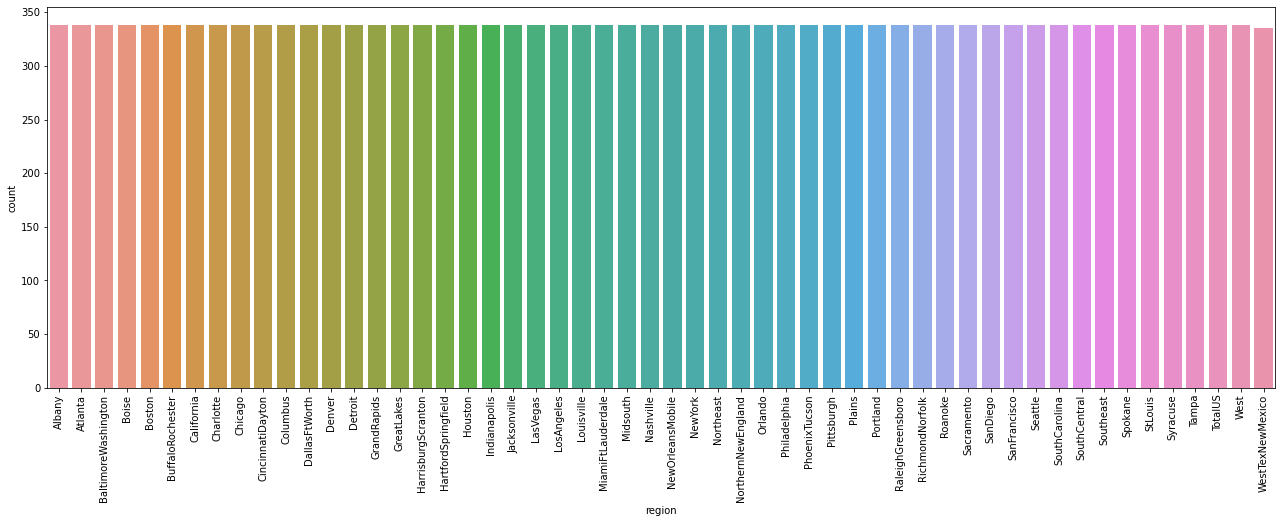

In [25]:
plt.figure(figsize=(22,7))
sns.countplot(x="region",data=df);
df.region.value_counts();
plt.xticks(rotation=90);

Counts of all the region are same except WestTexNewMexico which is slightly low.

In [26]:
df.YEAR.value_counts().sort_index()

2015    5615
2016    5616
2017    5722
2018    1296
Name: YEAR, dtype: int64

<AxesSubplot:xlabel='YEAR', ylabel='AveragePrice'>

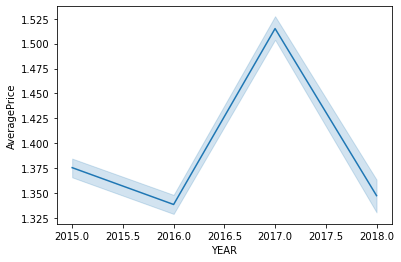

In [27]:
sns.lineplot(x="YEAR",y="AveragePrice",data=df)

Average price was lowest for 2016 and highest in 2017 but again decreased sharply after 2017.

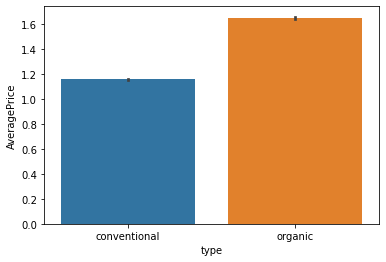

In [28]:
sns.barplot(x="type",y="AveragePrice",data=df);

Average Type of organic type is more than conventional type.

In [29]:
Region=df[["region","AveragePrice"]]
df1=Region
df1= pd.melt(df1, id_vars="AveragePrice", var_name="region", value_name="Values")
df1.head()

,AveragePrice,region,Values
0,1.33,region,Albany
1,1.35,region,Albany
2,0.93,region,Albany
3,1.08,region,Albany
4,1.28,region,Albany


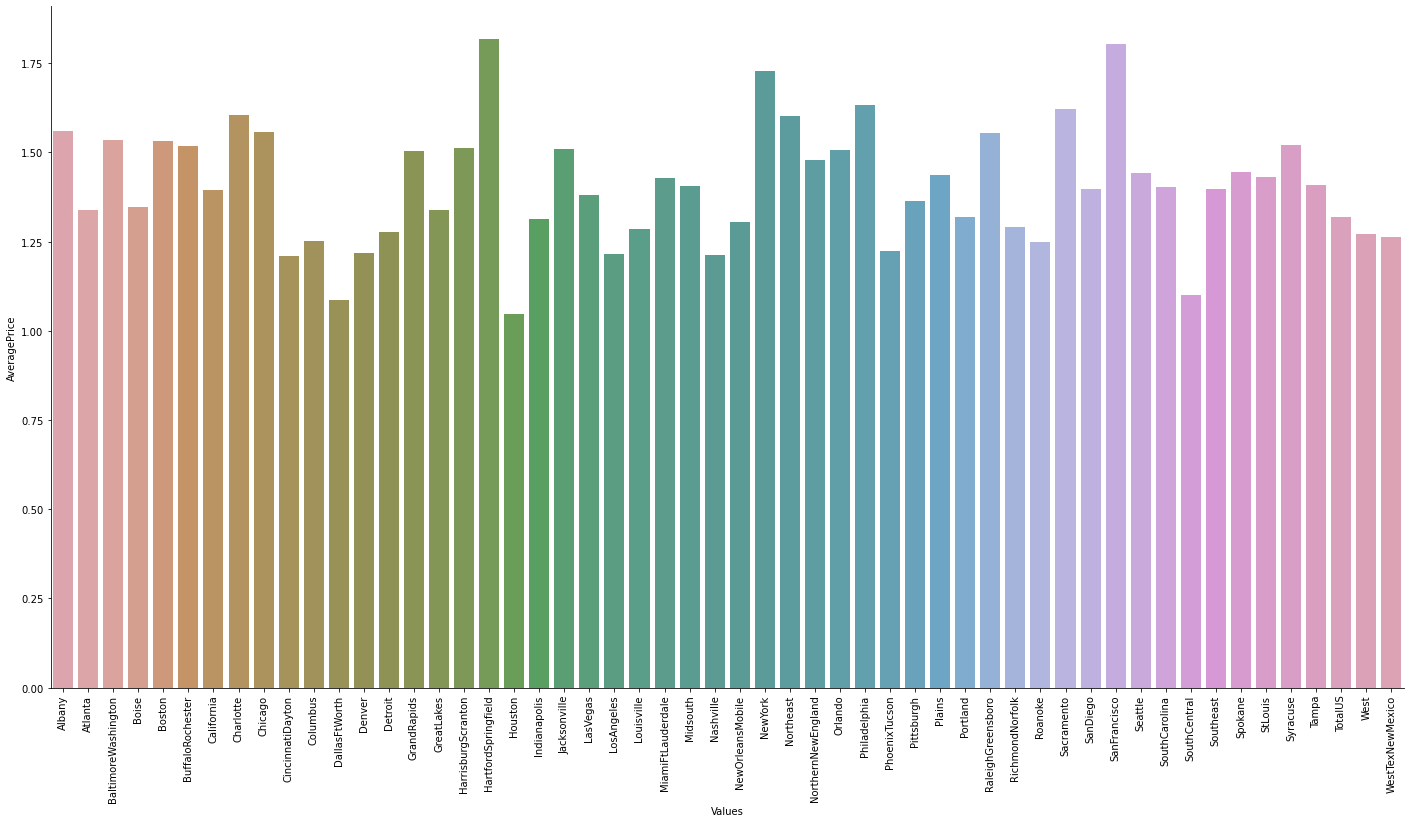

In [30]:
g=sns.catplot(x="Values", y="AveragePrice",data=df1, saturation=.5,kind="bar", ci=None, aspect=2,height=10)
g.set_xticklabels(rotation=90);

Average price in HartfordSpringfield and Sanfrancisco is highest.

<AxesSubplot:xlabel='YEAR', ylabel='Total Volume'>

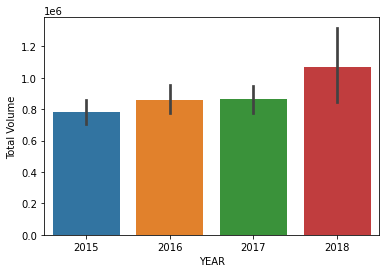

In [31]:
sns.barplot(x="YEAR",y="Total Volume",data=df)

Total Volume per Year was greatest for the year 2018.

In [32]:
Bags=df[["Small Bags","Large Bags","XLarge Bags","AveragePrice"]]
df3=Bags
df3= pd.melt(df3, id_vars="AveragePrice", var_name="Bags", value_name="Values")
df3.head()

,AveragePrice,Bags,Values
0,1.33,Small Bags,8603.62
1,1.35,Small Bags,9408.07
2,0.93,Small Bags,8042.21
3,1.08,Small Bags,5677.40
4,1.28,Small Bags,5986.26


<AxesSubplot:xlabel='Bags', ylabel='Values'>

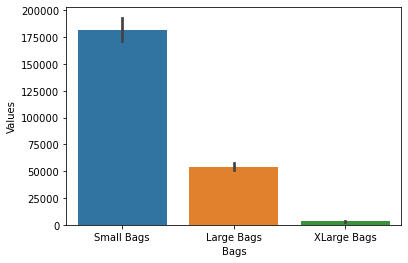

In [33]:
sns.barplot(x="Bags",y="Values",data=df3)

Values of Small Bags are largest as compared to large and xlarge bags. 

In [34]:
Types=df[["4046","4225","4770"]]
df4=Types
df4= pd.melt(df4,  var_name="Types", value_name="Values")
df4.head()

,Types,Values
0,4046,1036.74
1,4046,674.28
2,4046,794.70
3,4046,1132.00
4,4046,941.48


<AxesSubplot:xlabel='Types', ylabel='Values'>

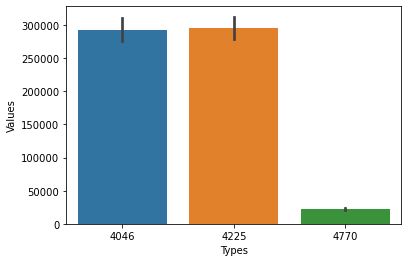

In [35]:
sns.barplot(x="Types",y="Values",data=df4)

Values of 4046 and 4225 are equal whereas 4770 has very low values.

In [36]:
df.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'region', 'YEAR', 'month', 'day'],
      dtype='object')

In [37]:
numerical_features=df.select_dtypes(include=[np.number]).columns
numerical_features

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'YEAR',
       'month', 'day'],
      dtype='object')

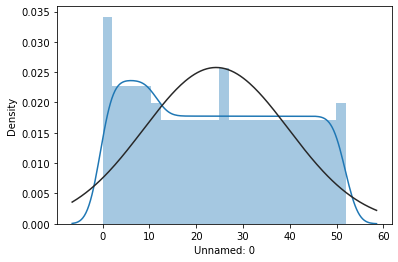

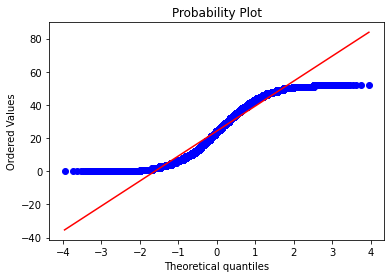

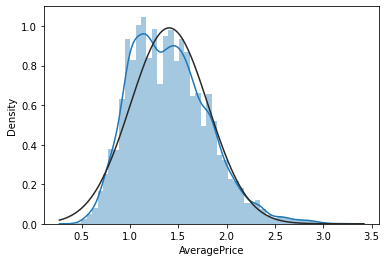

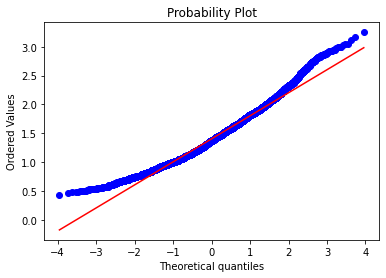

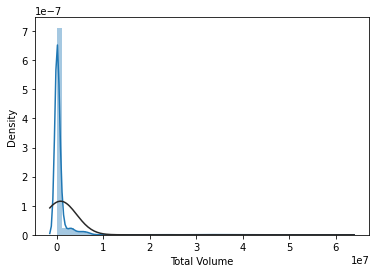

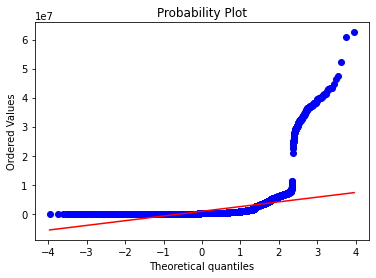

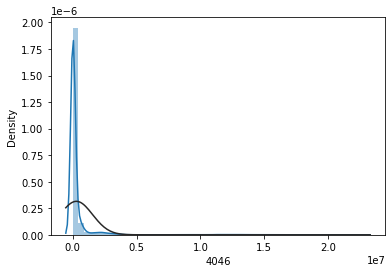

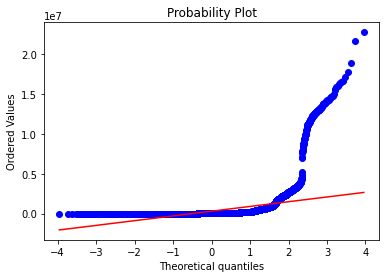

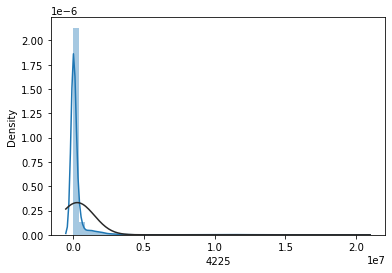

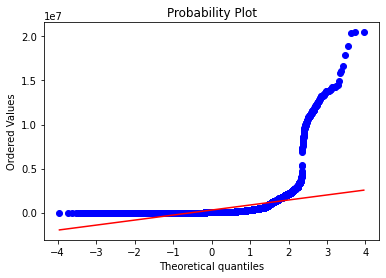

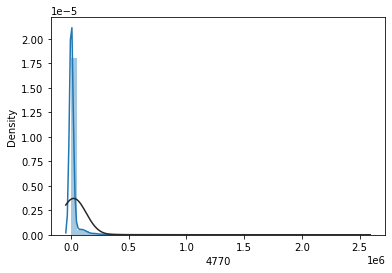

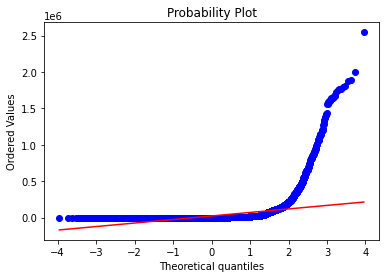

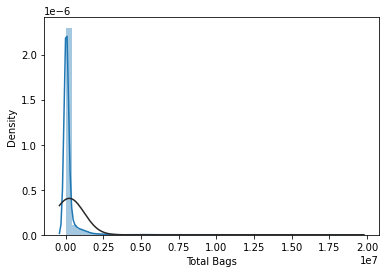

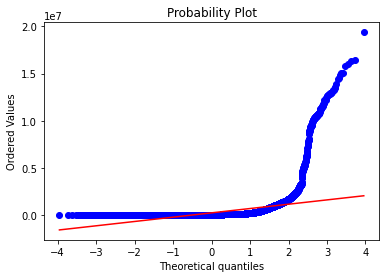

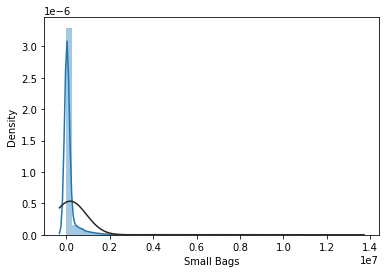

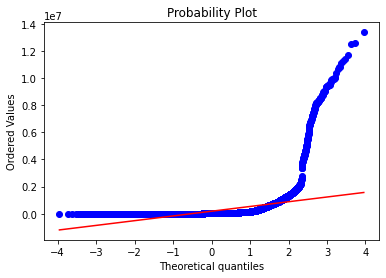

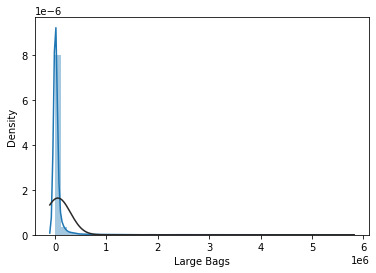

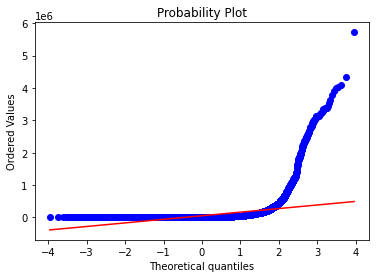

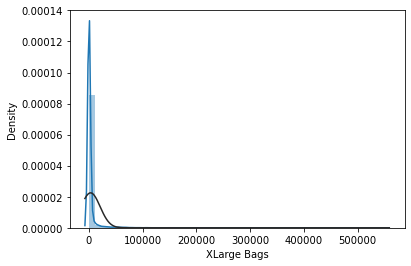

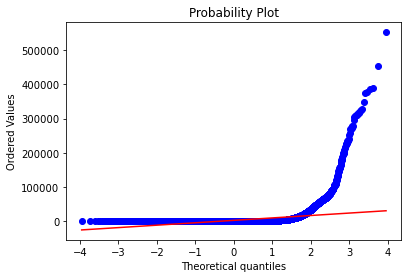

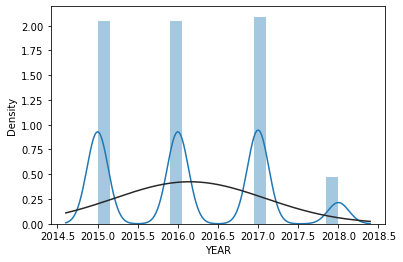

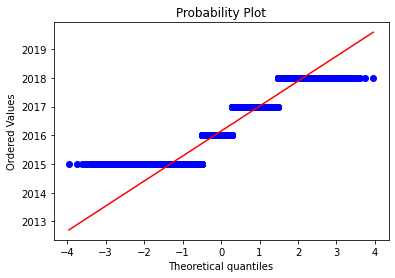

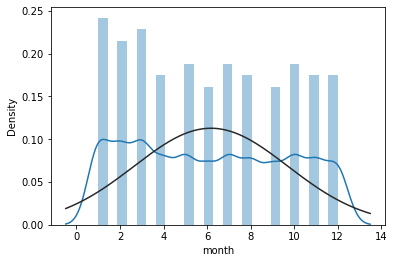

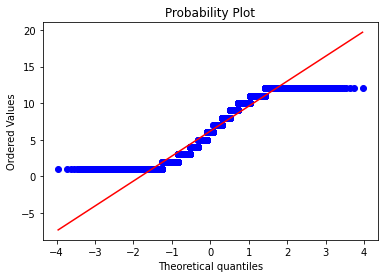

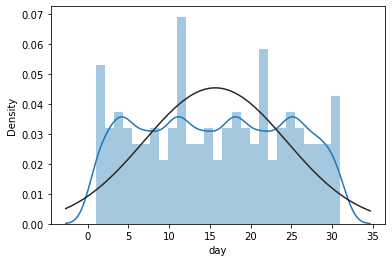

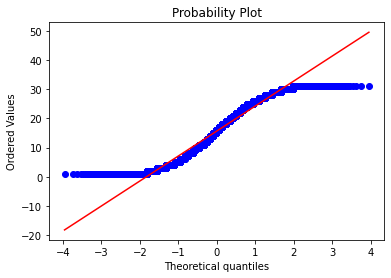

In [38]:
coll=numerical_features.values
for i in range(0,len(coll)):
    plt.figure()
    sns.distplot(df[coll[i]],fit=norm)
    plt.figure()
    res=stats.probplot(df[coll[i]],plot=plt)

#### 1.Highly Skewed Features:4046,4225,4770,Total Bags,Large Bags,Small Bags,XLarge Bags, Total Volume                        2.Negatively Skewed: type                                                                                                                                                                               3.Positively skewed: region                                                                                                                                                                       4.Discrete values: Year, Month and day.

# Box Plots showing outliers

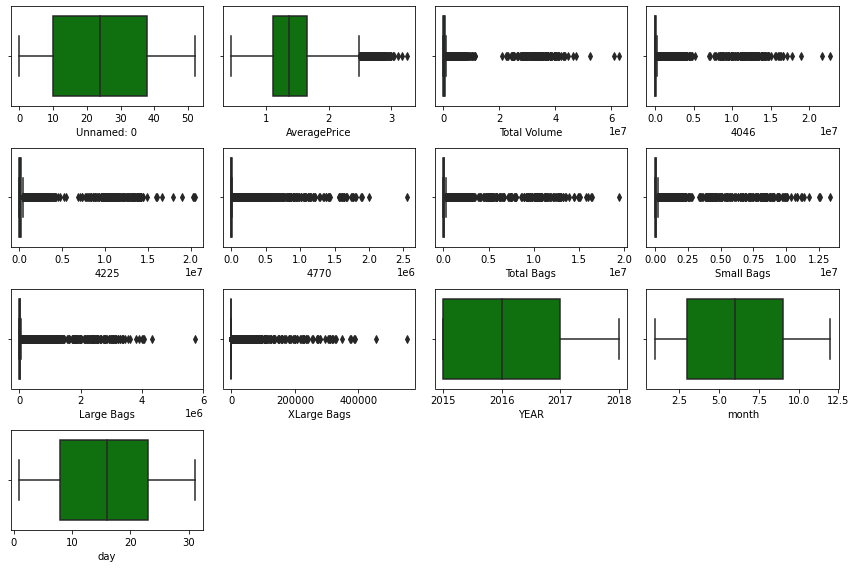

In [39]:
collist=numerical_features.values
ncol=4
nrows=4
plt.figure(figsize=(12,2*ncol))
for i in range(0, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color='green',orient='v')
    plt.tight_layout()

Except unnamed 0 , YEAR,month and day all the other features contain outliers.

# Multivariate Analysis

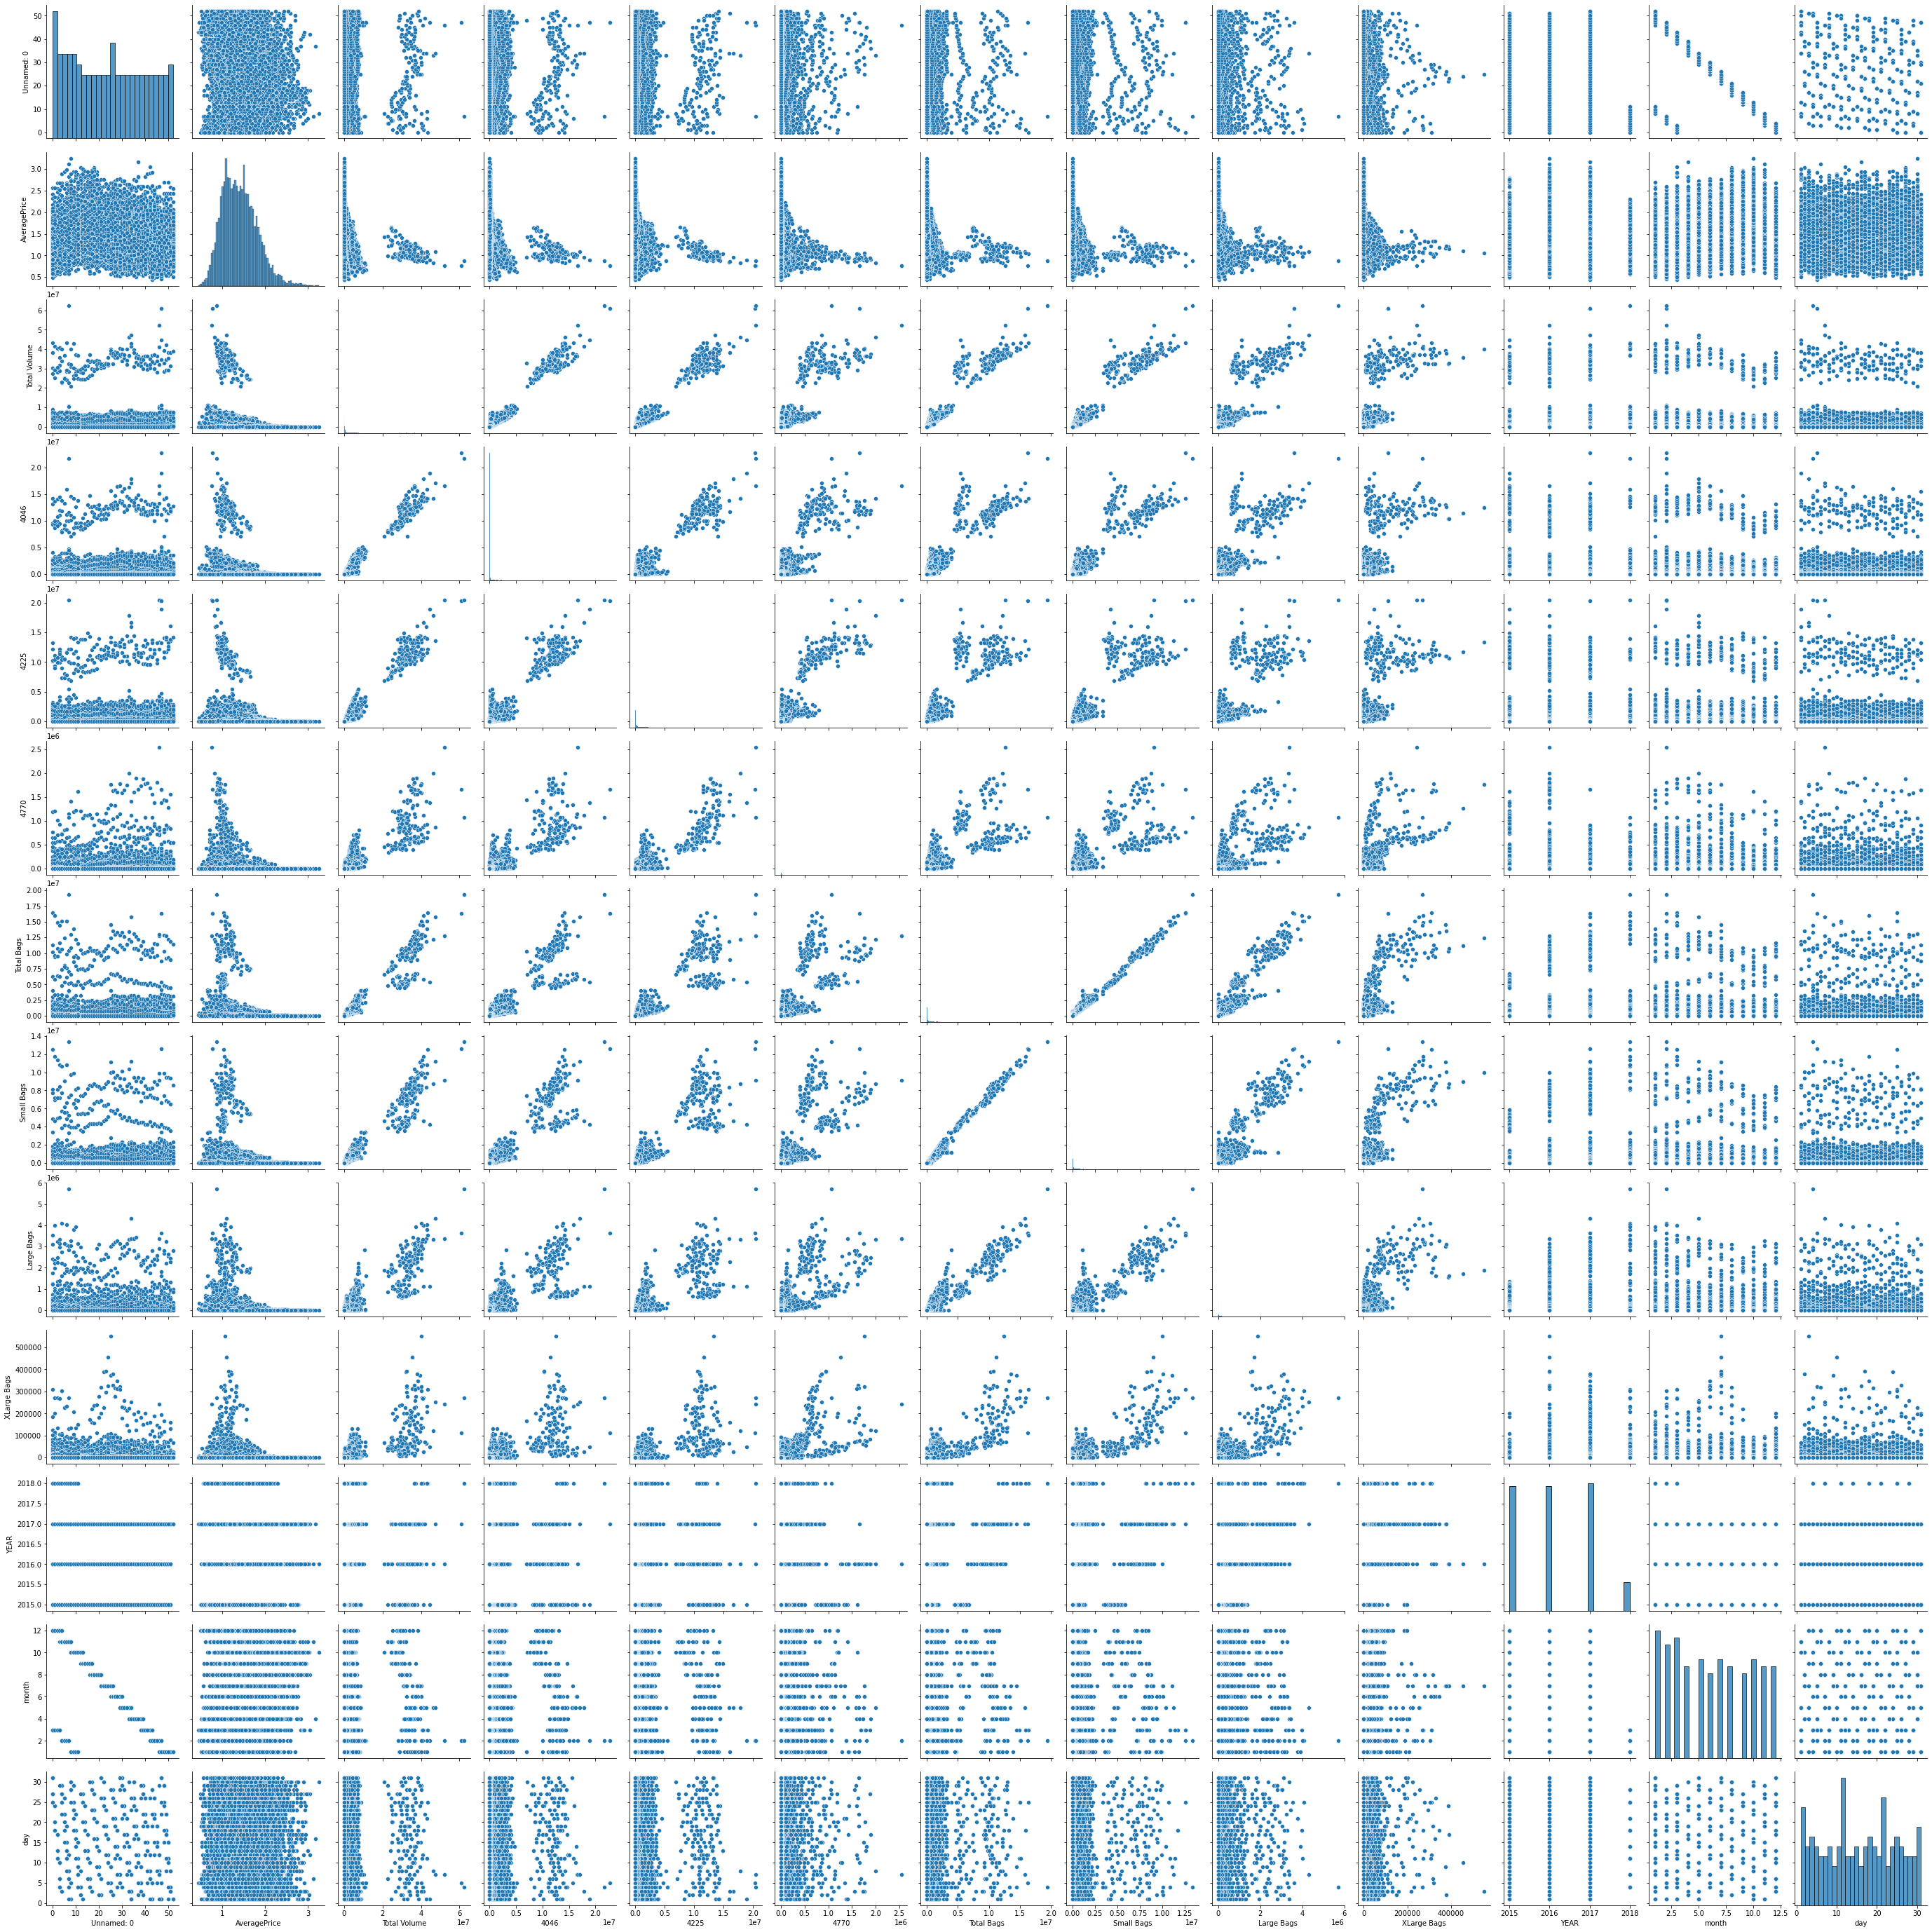

In [40]:
sns.pairplot(df,size=3)

# Skewness

In [41]:
df.skew()

Unnamed: 0       0.108334
AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
YEAR             0.215339
month            0.106617
day              0.014310
dtype: float64

# Dropping the columns

In [42]:
df.drop(['Total Volume','Small Bags','Unnamed: 0',],axis=1,inplace=True)

# Encoding

In [43]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['type']=LE.fit_transform(df['type'])
df['region']=LE.fit_transform(df['region'])

In [44]:
df.head()

,AveragePrice,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,type,region,YEAR,month,day
0,1.33,1036.74,54454.85,48.16,8696.87,93.25,0.0,0,0,2015,12,27
1,1.35,674.28,44638.81,58.33,9505.56,97.49,0.0,0,0,2015,12,20
2,0.93,794.70,109149.67,130.50,8145.35,103.14,0.0,0,0,2015,12,13
3,1.08,1132.00,71976.41,72.58,5811.16,133.76,0.0,0,0,2015,12,6
4,1.28,941.48,43838.39,75.78,6183.95,197.69,0.0,0,0,2015,11,29


# Removing the outliers

In [45]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.18868864, 0.23081597, 0.1999022 , ..., 1.22128204, 1.64763162,
        1.29185687],
       [0.13901962, 0.23110251, 0.20805446, ..., 1.22128204, 1.64763162,
        0.49423066],
       [1.18206895, 0.23100731, 0.1544779 , ..., 1.22128204, 1.64763162,
        0.30339555],
       ...,
       [1.15237477, 0.2306933 , 0.24309014, ..., 1.97050371, 1.46495942,
        0.60817726],
       [1.30138182, 0.2304279 , 0.24265143, ..., 1.97050371, 1.46495942,
        0.18944895],
       [0.53151208, 0.22934712, 0.24317042, ..., 1.97050371, 1.46495942,
        0.98707516]])

In [46]:
threshold=3
print(np.where(z>3))

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64), array([1, 1, 6, ..., 0, 0, 0], dtype=int64))


In [47]:
df_new=df[(z<3).all(axis=1)]

In [48]:
df_new.shape

(17653, 12)

# Separating x(Independent) and y(target) variable

In [49]:
x = df_new.drop('AveragePrice', axis=1)
y = df_new['AveragePrice']

In [50]:
x.head(2)

,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,type,region,YEAR,month,day
0,1036.74,54454.85,48.16,8696.87,93.25,0.0,0,0,2015,12,27
1,674.28,44638.81,58.33,9505.56,97.49,0.0,0,0,2015,12,20


In [51]:
y.head(2)

0    1.33
1    1.35
Name: AveragePrice, dtype: float64

# Removing Skewness

In [52]:
x.skew()

4046           4.903567
4225           4.451589
4770           5.111504
Total Bags     4.089312
Large Bags     5.053647
XLarge Bags    6.127601
type          -0.037510
region         0.012937
YEAR           0.229732
month          0.107560
day            0.011819
dtype: float64

In [53]:
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [54]:
x.skew()

4046          -0.420032
4225           0.103663
4770           0.068473
Total Bags    -0.383744
Large Bags     0.265484
XLarge Bags    1.216044
type          -0.037510
region         0.012937
YEAR           0.229732
month          0.107560
day            0.011819
dtype: float64

# Scaling

In [55]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)

In [56]:
x.head()

,4046,4225,4770,Total Bags,Large Bags,XLarge Bags,type,region,YEAR,month,day
0,-0.587447,0.338274,-0.246372,-0.473572,-0.918770,-0.627407,-1.018929,-1.695417,-1.210128,1.644690,1.289227
1,-0.719577,0.252479,-0.199607,-0.432063,-0.909993,-0.627407,-1.018929,-1.695417,-1.210128,1.644690,0.491611
2,-0.669116,0.650829,-0.001668,-0.504158,-0.898745,-0.627407,-1.018929,-1.695417,-1.210128,1.644690,-0.306005
3,-0.560440,0.461348,-0.146073,-0.661791,-0.845005,-0.627407,-1.018929,-1.695417,-1.210128,1.644690,-1.103621
4,-0.617056,0.244748,-0.135485,-0.632765,-0.758582,-0.627407,-1.018929,-1.695417,-1.210128,1.362203,1.517117


# Finding the best random state

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
lr=LinearRegression()
for i in range (0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state{i},the training accuracy is:{r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is:{r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is:0.5365581343662649
At random state0,the testing accuracy is:0.5243144539425346


At random state1,the training accuracy is:0.5308887465102791
At random state1,the testing accuracy is:0.5383812972104902


At random state2,the training accuracy is:0.5408889947778713
At random state2,the testing accuracy is:0.5141862620682256


At random state3,the training accuracy is:0.530062541062845
At random state3,the testing accuracy is:0.5403647388199817


At random state4,the training accuracy is:0.5337297732673173
At random state4,the testing accuracy is:0.5316797315284396


At random state5,the training accuracy is:0.5286806417338488
At random state5,the testing accuracy is:0.5431337807049161


At random state6,the training accuracy is:0.5323309713136621
At random state6,the testing accuracy is:0.5347901022291808


At random state7,the training accuracy is:0.5342145795632124
At random state7,the testing accuracy is:0.5306037907827768


At random state8,

# Train Test Split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

# Model Selection

# Linear Regression

In [59]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [60]:
lm.intercept_

1.4081890117383058

In [61]:
lm.score(x_train,y_train)

0.5331065955354971

In [62]:
pred=lm.predict(x_test)
print("Predicted Sales:",pred)
print("Actual Sales:",y_test)

Predicted Sales: [1.62780127 0.98569549 1.67037814 ... 1.31490143 1.41792344 1.69075445]
Actual Sales: 16793    1.04
2621     1.18
10919    1.83
1111     0.96
13277    1.57
         ... 
12554    1.25
12613    1.29
8676     1.09
7634     1.02
12027    1.66
Name: AveragePrice, Length: 5296, dtype: float64


In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
print("r2 Score:",r2_score(y_test,pred))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,pred))
print("Mean Squared Error:",mean_squared_error(y_test,pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,pred)))

r2 Score: 0.5325477021739065
Error:
Mean Absolute Error: 0.20705255405651038
Mean Squared Error: 0.06820049091812026
Root Mean Squared Error: 0.2611522370536394


# Decision Tree Regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [65]:
dtr.score(x_train,y_train)

1.0

In [66]:
dtr.score(x_test,y_test)

0.7694628923737359

In [67]:
preddtr=dtr.predict(x_test)
print("Predicted Sales:",preddtr)
print("Actual Sales:",y_test)

Predicted Sales: [1.01 1.16 1.86 ... 1.15 1.26 1.84]
Actual Sales: 16793    1.04
2621     1.18
10919    1.83
1111     0.96
13277    1.57
         ... 
12554    1.25
12613    1.29
8676     1.09
7634     1.02
12027    1.66
Name: AveragePrice, Length: 5296, dtype: float64


In [68]:
print("r2 Score:",r2_score(y_test,preddtr))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,preddtr))
print("Mean Squared Error:",mean_squared_error(y_test,preddtr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,preddtr)))

r2 Score: 0.7694628923737359
Error:
Mean Absolute Error: 0.12125
Mean Squared Error: 0.03363496978851964
Root Mean Squared Error: 0.18339839091038843


# SVR

In [69]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [70]:
svr.score(x_train,y_train)

0.8049261574087001

In [71]:
predsvr=svr.predict(x_test)
print("Predicted Sales:",predsvr)
print("Actual Sales:",y_test)

Predicted Sales: [1.40315318 1.08243576 1.88358424 ... 1.1994949  1.3429959  1.54058028]
Actual Sales: 16793    1.04
2621     1.18
10919    1.83
1111     0.96
13277    1.57
         ... 
12554    1.25
12613    1.29
8676     1.09
7634     1.02
12027    1.66
Name: AveragePrice, Length: 5296, dtype: float64


In [72]:
print("r2 Score:",r2_score(y_test,predsvr))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,predsvr))
print("Mean Squared Error:",mean_squared_error(y_test,predsvr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predsvr)))

r2 Score: 0.7823583897832946
Error:
Mean Absolute Error: 0.1333337539752809
Mean Squared Error: 0.03175353876752497
Root Mean Squared Error: 0.17819522655650732


# Random Forest Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)

RandomForestRegressor()

In [74]:
rfr.score(x_train,y_train)

0.9828690658891528

In [75]:
predrfr=rfr.predict(x_test)
print("Predicted Sales:",predrfr)
print("Actual Sales:",y_test)

Predicted Sales: [1.2534 1.1336 1.8364 ... 1.1375 1.1636 1.5852]
Actual Sales: 16793    1.04
2621     1.18
10919    1.83
1111     0.96
13277    1.57
         ... 
12554    1.25
12613    1.29
8676     1.09
7634     1.02
12027    1.66
Name: AveragePrice, Length: 5296, dtype: float64


In [76]:
print("r2 Score:",r2_score(y_test,predrfr))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,predrfr))
print("Mean Squared Error:",mean_squared_error(y_test,predrfr))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predrfr)))

r2 Score: 0.8874567417277797
Error:
Mean Absolute Error: 0.09160932779456192
Mean Squared Error: 0.01641986893504532
Root Mean Squared Error: 0.12814003642517557


# XGBRegressor

In [77]:
from xgboost import XGBRegressor
model=XGBRegressor(n_estimators=1000,learning_rate=0.05)
model.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=1000, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
y_pred=model.predict(x_test)
y_pred

array([1.3268282, 1.1910169, 1.6416994, ..., 1.1826483, 1.1329621,
       1.6390812], dtype=float32)

In [79]:
model.score(x_train,y_train)

0.9786630188919773

In [80]:
predxgb=model.predict(x_test)
print("Predicted Sales:",predxgb)
print("Actual Sales:",y_test)

Predicted Sales: [1.3268282 1.1910169 1.6416994 ... 1.1826483 1.1329621 1.6390812]
Actual Sales: 16793    1.04
2621     1.18
10919    1.83
1111     0.96
13277    1.57
         ... 
12554    1.25
12613    1.29
8676     1.09
7634     1.02
12027    1.66
Name: AveragePrice, Length: 5296, dtype: float64


In [81]:
print("r2 Score:",r2_score(y_test,predxgb))
print("Error:")
print("Mean Absolute Error:",mean_absolute_error(y_test,predxgb))
print("Mean Squared Error:",mean_squared_error(y_test,predxgb))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,predxgb)))

r2 Score: 0.913311958573762
Error:
Mean Absolute Error: 0.08213992685349686
Mean Squared Error: 0.012647637009154849
Root Mean Squared Error: 0.11246171352578106


# Cross Validation

In [82]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k=5
kfold=KFold(n_splits=k,shuffle=True)
K_results=cross_val_score(lm,x,y,cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.5320908516885988

In [83]:
from sklearn.model_selection import KFold
k=5
kfold=KFold(n_splits=k,shuffle=True)
K_results=cross_val_score(dtr,x,y,cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.758652554752627

In [84]:
k=5
kfold=KFold(n_splits=k,shuffle=True)
K_results=cross_val_score(svr,x,y,cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.7857048576755077

In [85]:
k=5
kfold=KFold(n_splits=k,shuffle=True)
K_results=cross_val_score(rfr,x,y,cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.8889536622576838

In [86]:
k=5
kfold=KFold(n_splits=k,shuffle=True)
K_results=cross_val_score(model,x,y,cv=kfold)
accuracy=np.mean(abs(K_results))
accuracy

0.9135713759235988

As the least difference between accuracy and cross validation score is for Random Forest Regressor , it is our best model.

# Plot of Random Forest Regressor

<function matplotlib.pyplot.show(close=None, block=None)>

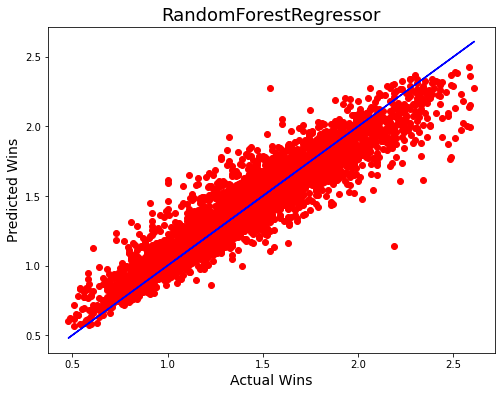

In [87]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=predrfr,color='r')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Wins',fontsize=14)
plt.ylabel('Predicted Wins',fontsize=14)
plt.title('RandomForestRegressor',fontsize=18)
plt.show

# Hyperparameter Tuning

In [93]:
from sklearn.model_selection import GridSearchCV
parameters={'n_jobs':(None,list(np.arange(1,10))),"warm_start":[True,False],"oob_score":[True,False],
            'bootstrap':[True,False]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'bootstrap': True, 'n_jobs': None, 'oob_score': False, 'warm_start': True}


In [94]:
rf=RandomForestRegressor(bootstrap = True,n_jobs= None,oob_score=False,warm_start= True)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs=r2_score(y_test,pred_decision)
print('R2 score:',rfs*100)

R2 score: 88.8361571506321


# Model Saving

In [95]:
import pickle
filename='avacado.pkl'
pickle.dump(rf,open(filename,'wb'))

# Prediction

In [96]:
loaded_model=pickle.load(open('avacado.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.888361571506321


In [97]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Original"])
conclusion

0       1       2       3       4       5       6       7     \
Predicted  1.1858  1.1402  1.7952  1.0424  1.5373  1.1791  1.1514  0.5774   
Original   1.1858  1.1402  1.7952  1.0424  1.5373  1.1791  1.1514  0.5774   

             8       9       10     11      12      13      14      15    \
Predicted  0.9209  1.2617  1.0945  1.479  1.8334  1.5069  1.9899  1.1043   
Original   0.9209  1.2617  1.0945  1.479  1.8334  1.5069  1.9899  1.1043   

             16      17      18      19      20      21      22      23    \
Predicted  0.9344  1.2226  1.8033  1.5351  1.1352  1.1443  1.3509  1.3291   
Original   0.9344  1.2226  1.8033  1.5351  1.1352  1.1443  1.3509  1.3291   

             24      25      26      27      28      29      30      31    \
Predicted  1.8781  2.0912  1.6878  1.0923  1.3402  1.1814  1.0924  1.3973   
Original   1.8781  2.0912  1.6878  1.0923  1.3402  1.1814  1.0924  1.3973   

             32      33      34      35      36      37      38      39    \
Predicted  2.1511  1.6845  1.9076  1.3042  1.0512  1.1686  1.1768  1.0435   
Original   2.1511  1.6845  1.9076  1.3042  1.0512  1.1686  1.1768  1.0435   

             40      41     42      43      44      45      46      47    \
Predicted  1.1987  1.6071  0.921  1.7158  1.2791  1.5596  1.1426  1.6263   
Original   1.1987  1.6071  0.921  1.7158  1.2791  1.5596  1.1426  1.6263   

            48      49      50      51      52      53      54      55    \
Predicted  1.268  1.0129  1.6734  1.9981  1.7058  1.7776  1.1102  1.1208   
Original   1.268  1.0129  1.6734  1.9981  1.7058  1.7776  1.1102  1.1208   

             56      57      58      59      60     61      62      63    \
Predicted  1.0107  1.0561  1.2377  1.4016  1.5065  1.359  1.6933  1.0742   
Original   1.0107  1.0561  1.2377  1.4016  1.5065  1.359  1.6933  1.0742   

             64      65      66      67      68     69     70      71    \
Predicted  1.2315  1.4727  1.9935  1.6579  1.1416  1.204  1.554  1.8253   
Original   1.2315  1.4727  1.9935  1.6579  1.1416  1.204  1.554  1.8253   

             72      73      74      75      76      77      78      79    \
Predicted  1.2213  1.7857  0.9568  2.0207  1.6029  1.0033  0.5926  1.1048   
Original   1.2213  1.7857  0.9568  2.0207  1.6029  1.0033  0.5926  1.1048   

             80      81      82      83      84      85      86      87    \
Predicted  1.0689  1.7059  1.7424  0.7608  0.8892  1.0733  1.1349  1.5229   
Original   1.0689  1.7059  1.7424  0.7608  0.8892  1.0733  1.1349  1.5229   

             88      89      90      91      92      93     94      95    \
Predicted  1.7436  1.9972  0.9565  0.8438  1.0049  1.1985  1.013  1.7192   
Original   1.7436  1.9972  0.9565  0.8438  1.0049  1.1985  1.013  1.7192   

             96      97      98      99     100     101     102    103   \
Predicted  1.8003  1.5512  1.3902  1.7897  1.057  1.0158  1.5451  1.138   
Original   1.8003  1.5512  1.3902  1.7897  1.057  1.0158  1.5451  1.138   

             104     105     106     107     108     109     110     111   \
Predicted  0.8706  1.1908  2.1366  1.8598  1.7189  1.7482  1.9156  0.8452   
Original   0.8706  1.1908  2.1366  1.8598  1.7189  1.7482  1.9156  0.8452   

             112     113    114     115     116    117    118     119   \
Predicted  1.3302  1.3887  0.837  1.2441  1.0736  1.307  1.175  1.7397   
Original   1.3302  1.3887  0.837  1.2441  1.0736  1.307  1.175  1.7397   

             120     121     122     123     124     125     126     127   \
Predicted  1.4357  1.1863  1.0435  1.8889  1.0109  1.4693  1.3455  1.2154   
Original   1.4357  1.1863  1.0435  1.8889  1.0109  1.4693  1.3455  1.2154   

             128     129     130     131     132     133     134     135   \
Predicted  1.1615  0.8783  1.4497  1.1568  1.0417  1.3352  1.0288  1.3401   
Original   1.1615  0.8783  1.4497  1.1568  1.0417  1.3352  1.0288  1.3401   

             136     137    138     139     140     141     142     143   \
Predicted  1.1288  1.0524  1.